# House Advanced Regression Assignment

- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house

In [10]:
# Import Libraries for model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib
import statsmodels
import pylab as py
import scipy
import scipy.stats as stats

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Libraries to suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Data understanding and Preparation

In [11]:
# Laod data
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [13]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
house.shape

(1460, 81)

### Data Preparation

In [15]:
# Check for missing data
house.isnull().sum().sum()

6965

In [16]:
# Check for missing values in each coloumn
missing_columns =  house.columns[house.isnull().any()]
nullval = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=["Null values in %"])
nullval.index.name = 'Feature names'
nullval.head(10)

,Null values in %
Feature names,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [17]:
# Drop features with higher missing values as they are not useful for model building
for col in missing_columns:
    if house[col].isnull().sum()*100/house.shape[0]>45:
        house.drop(col,1, inplace=True)
        
house.shape

(1460, 76)

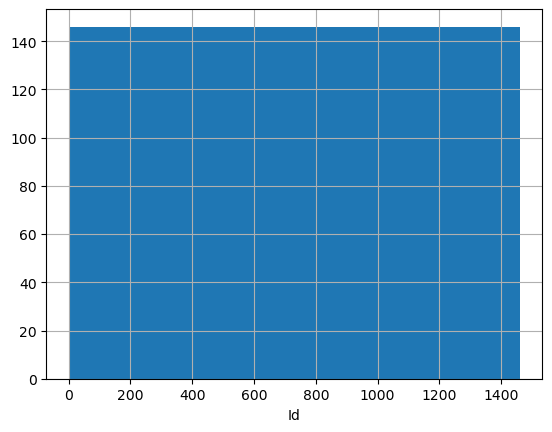

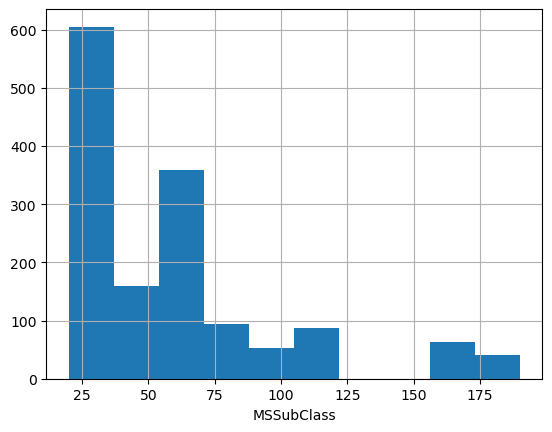

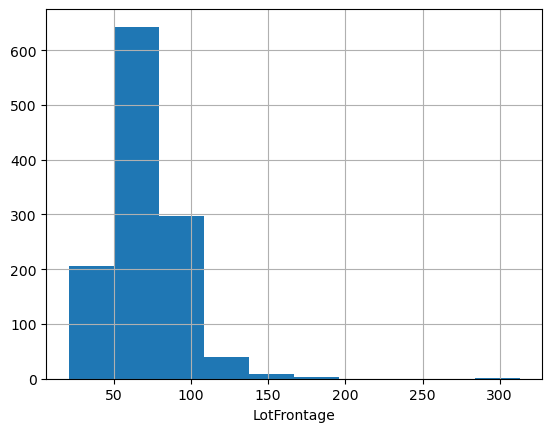

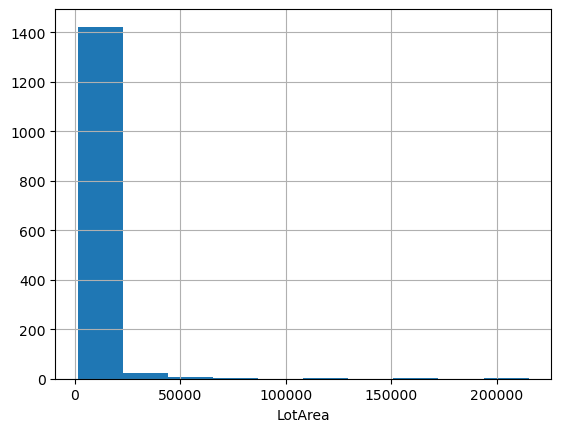

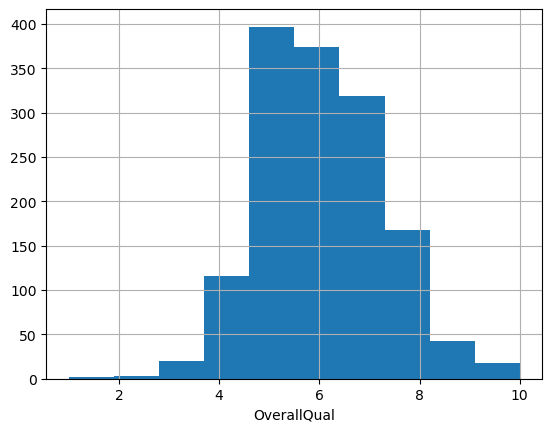

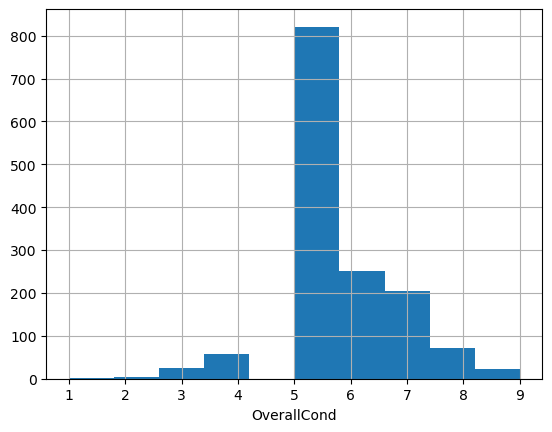

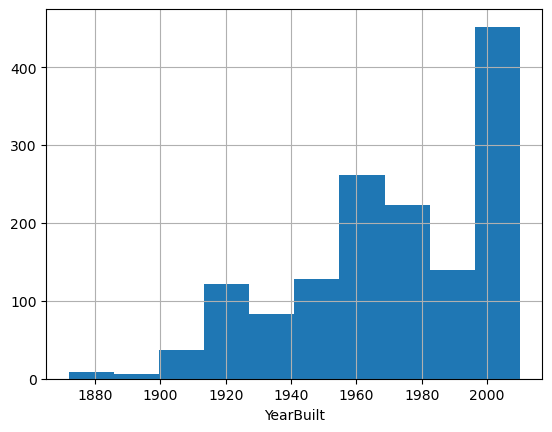

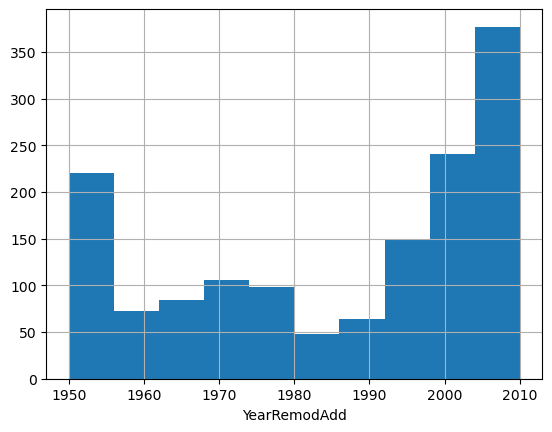

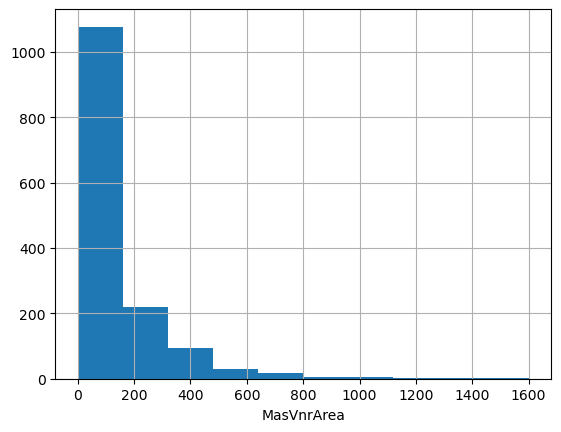

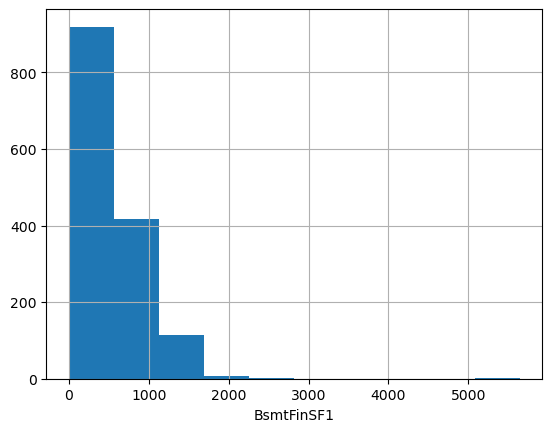

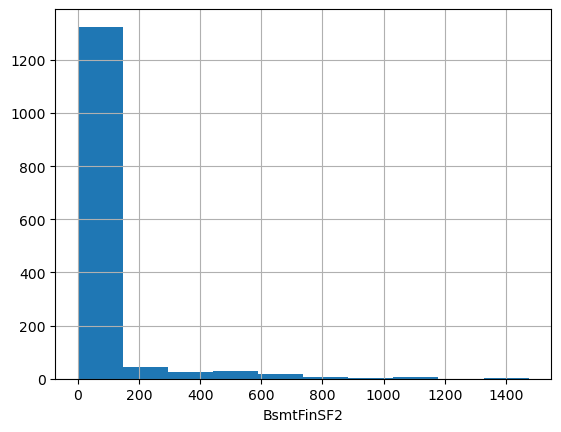

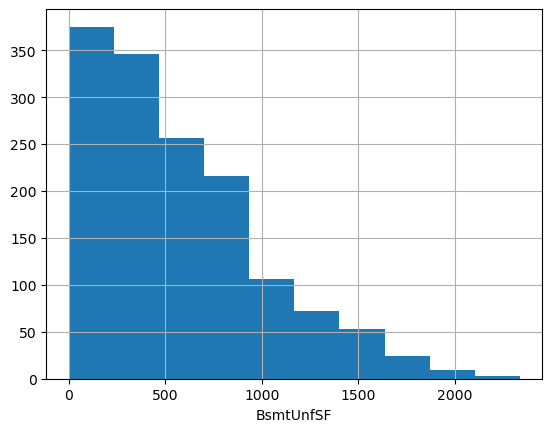

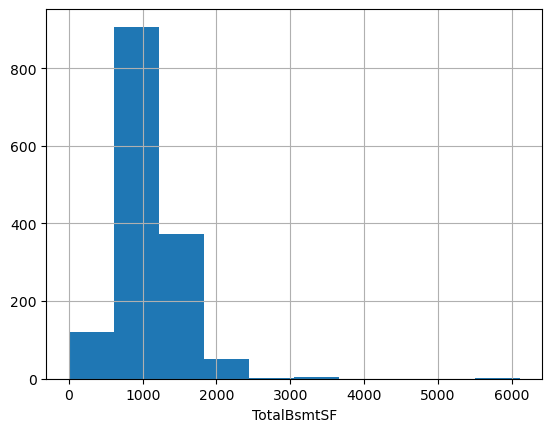

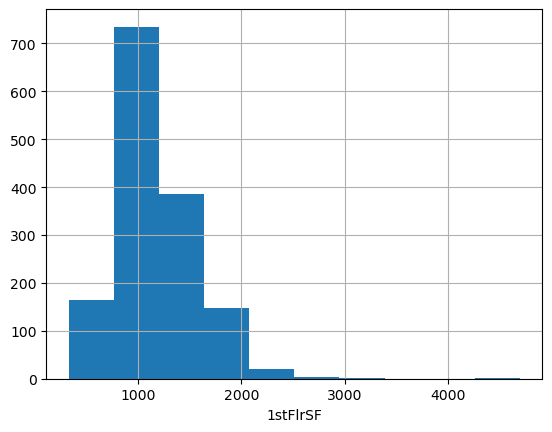

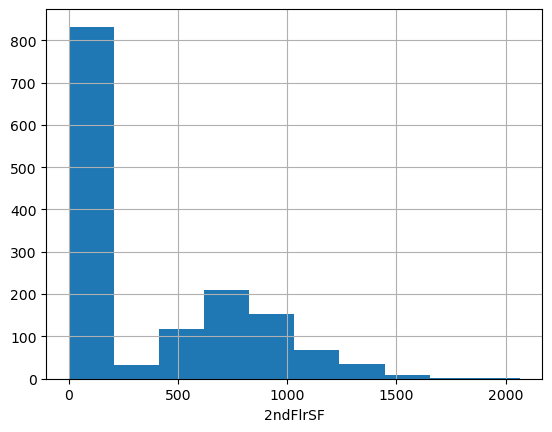

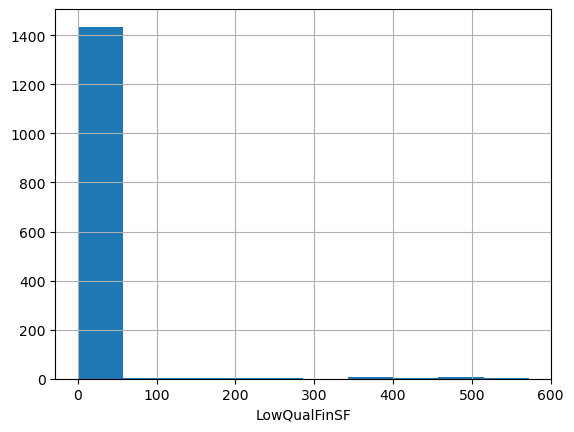

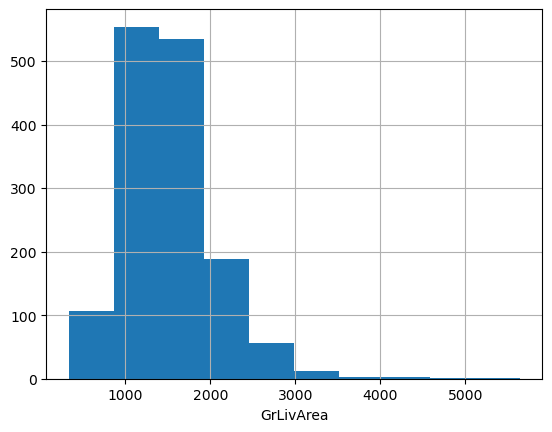

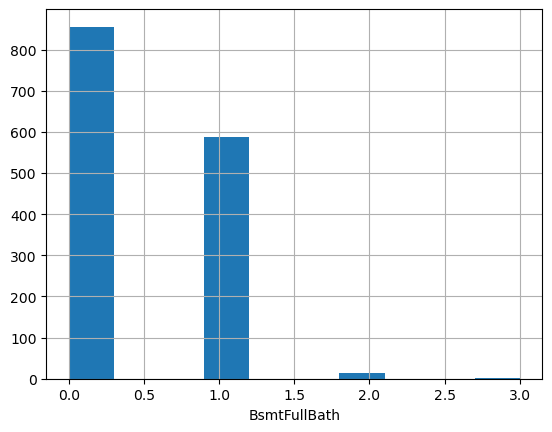

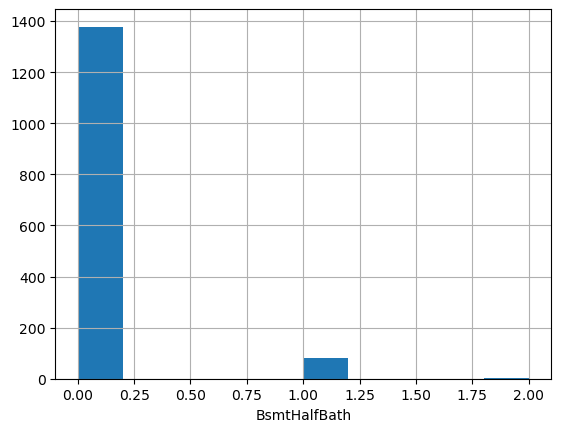

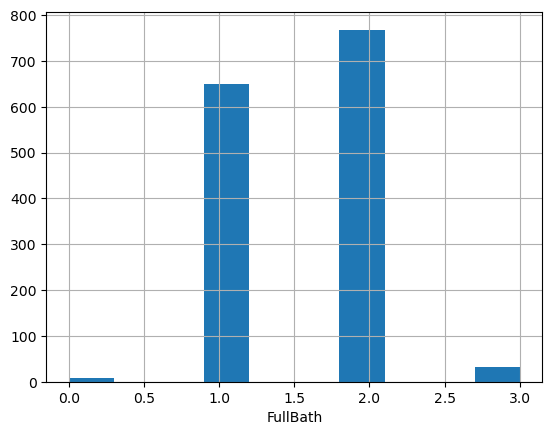

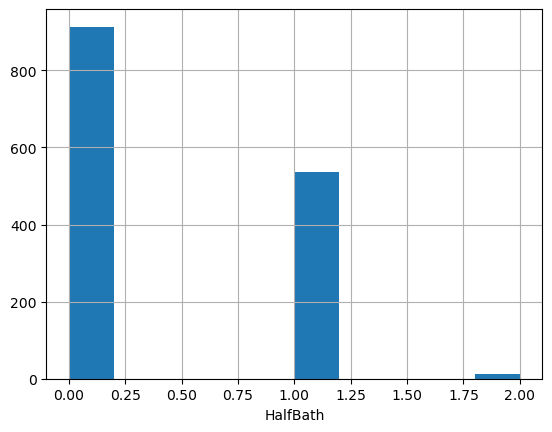

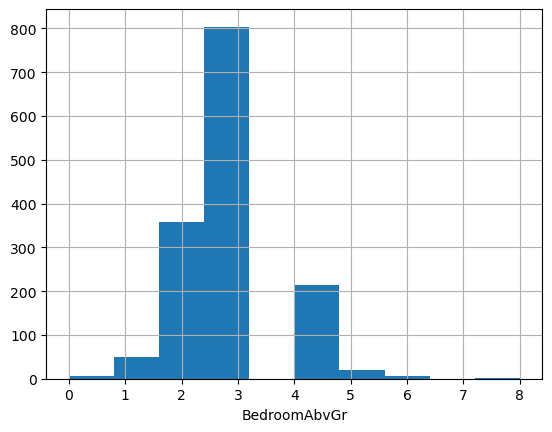

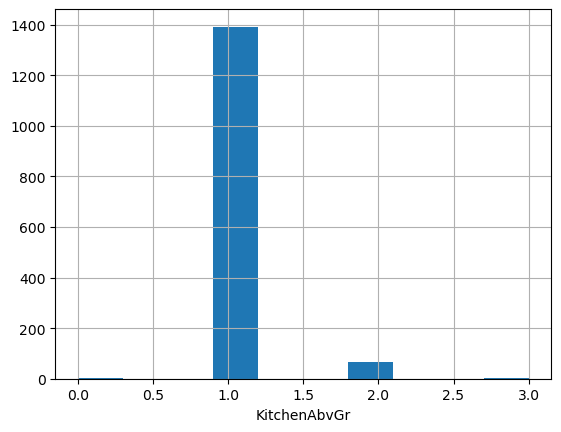

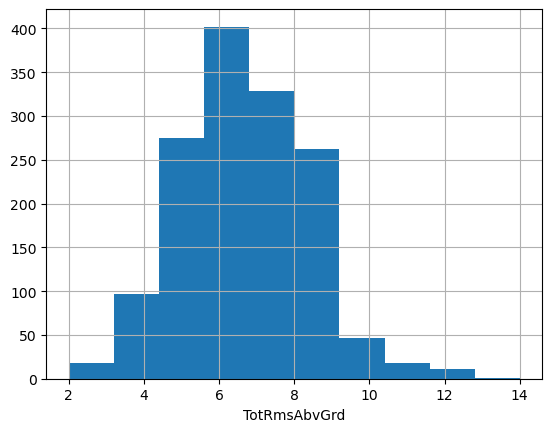

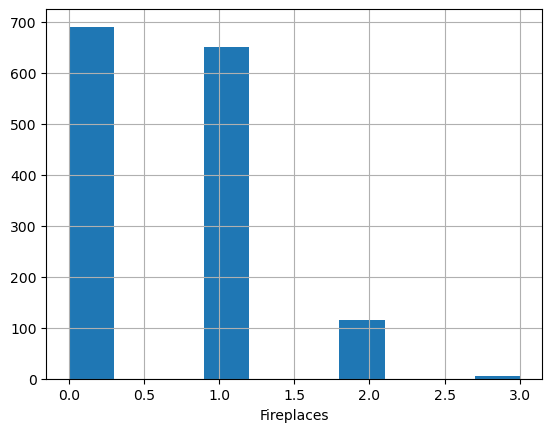

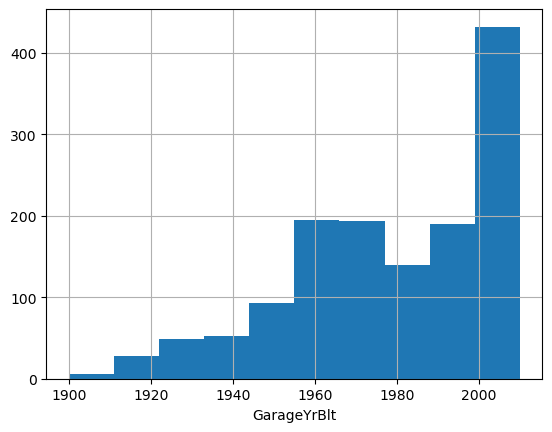

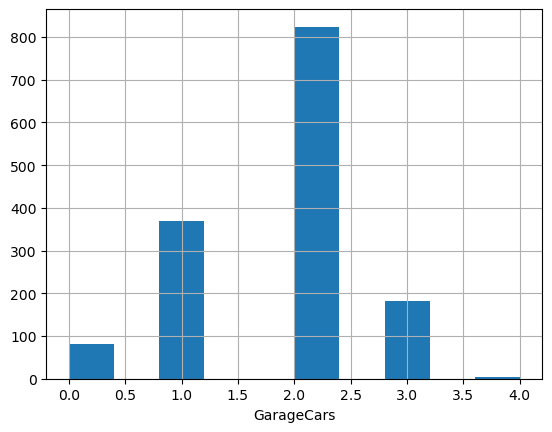

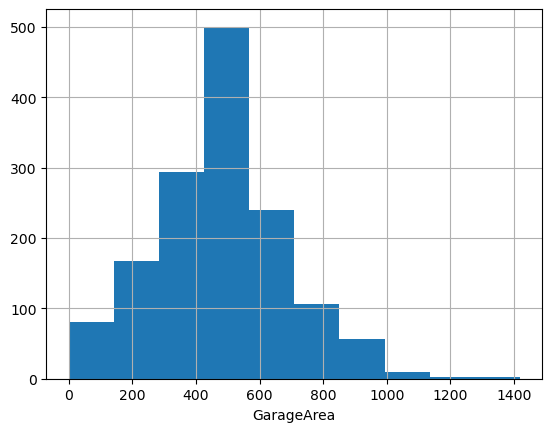

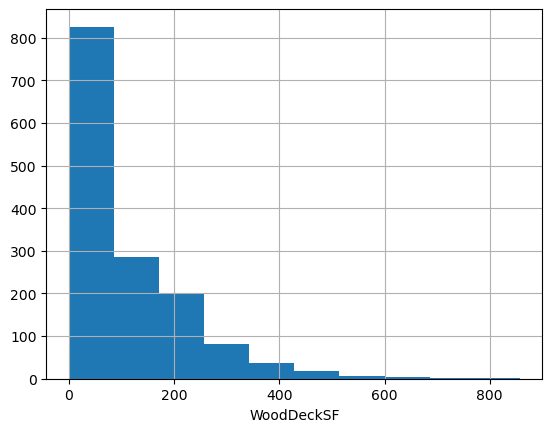

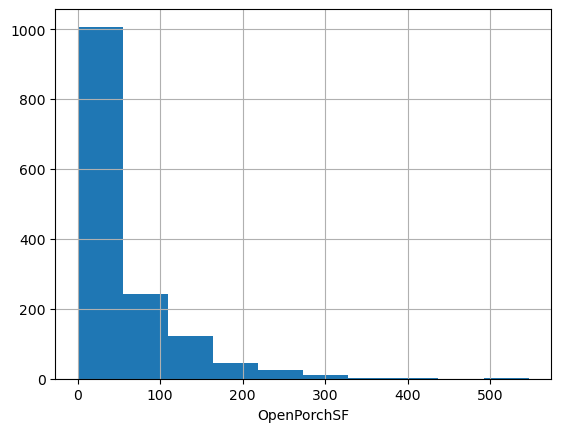

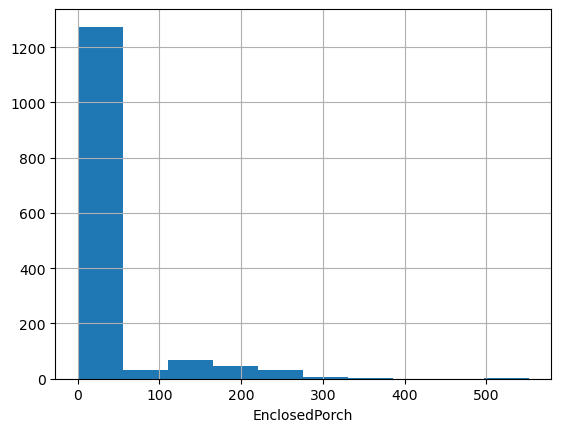

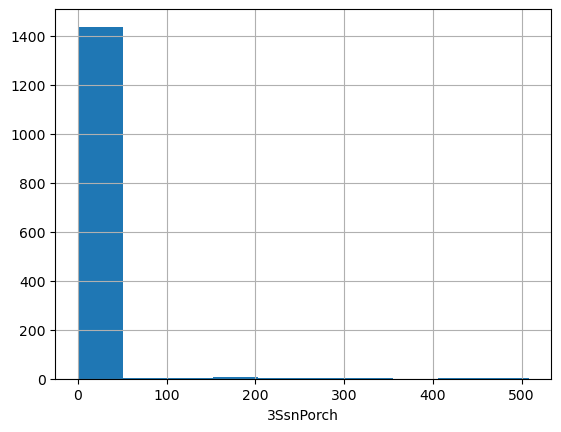

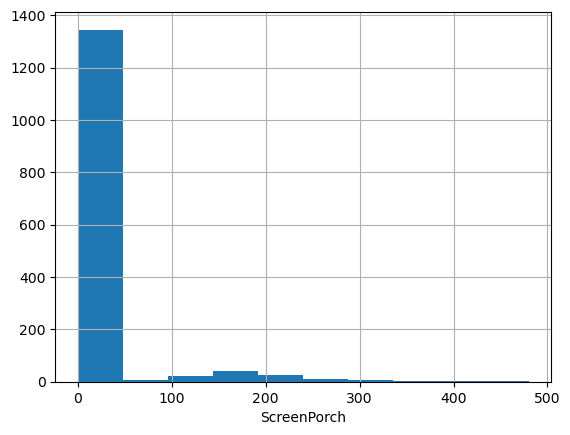

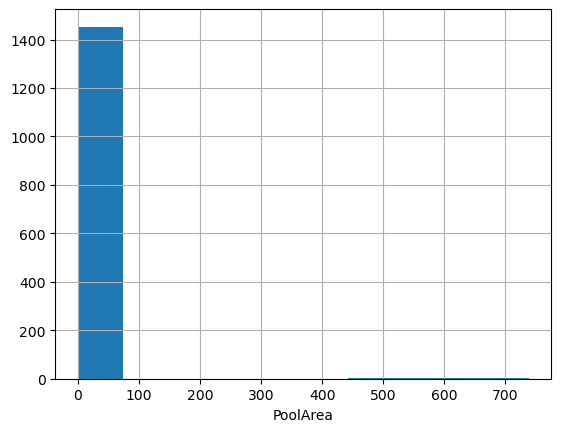

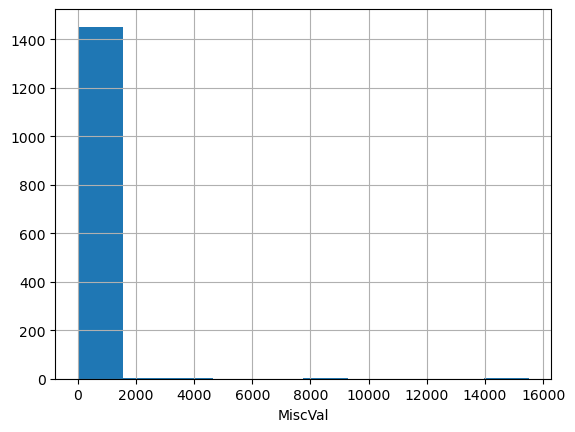

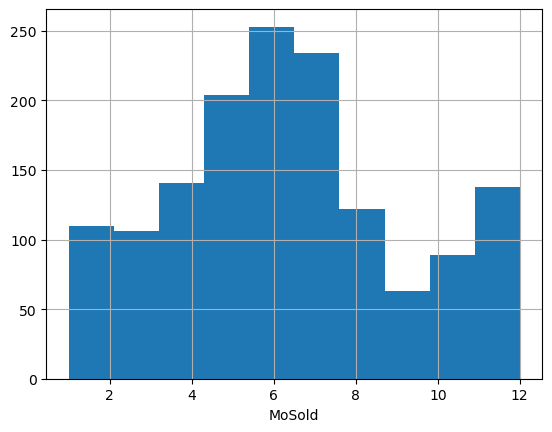

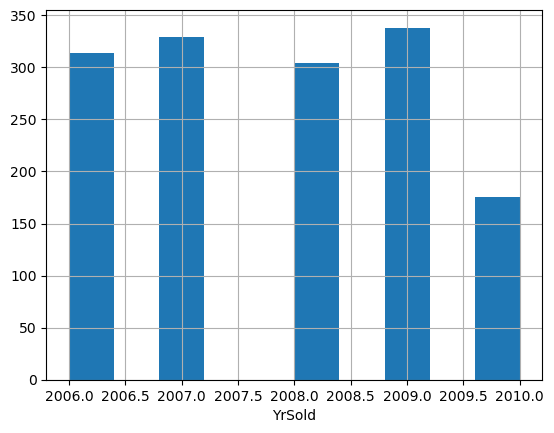

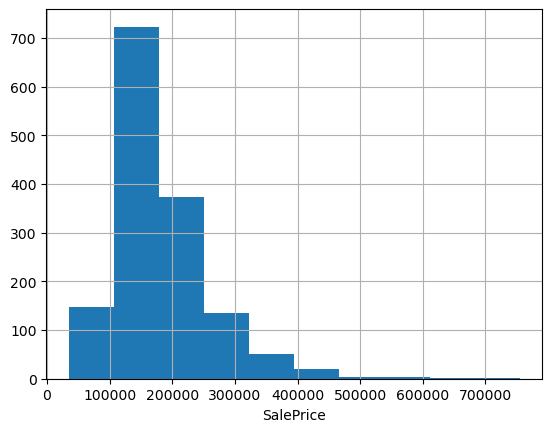

In [18]:
#checking for skewness in numerical data
numerical_features=[feature for feature in house.columns if house[feature].dtypes!='object']
for feature in numerical_features:
    if feature=='class(target)':
        pass
    else:
    
        
        house[feature].hist()
        plt.xlabel(feature)
        plt.show()

The histograms above describe the skewness of the data. They also suggest that LowQualFinSF, PoolArea, MiscVal, and 3SsnPorch contain very little variety in values

In [19]:
house=house.drop(['LowQualFinSF','PoolArea','MiscVal','3SsnPorch'],axis=1)
house.shape

(1460, 72)

In [20]:
# re-check the amount of missing values in the columns
columns_nan =  house.columns[house.isnull().any()]

for c in columns_nan:
    print(c, house[c].isnull().sum())

LotFrontage 259
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81


In [21]:
#imputing the media
house['LotFrontage']=house['LotFrontage'].fillna(house['LotFrontage'].median())
house['GarageYrBlt']=house['GarageYrBlt'].fillna(house['GarageYrBlt'].median())
house['MasVnrArea']=house['MasVnrArea'].fillna(house['MasVnrArea'].median())

In [22]:
#categorical values: imputing the mode
for col in ('MasVnrType', 'GarageCond', 'GarageType', 'GarageFinish','GarageQual','BsmtExposure', 'BsmtFinType2', 'BsmtFinType1','BsmtCond','BsmtQual', 'Electrical'):
    
    house[col] = house[col].fillna(house[col].mode()[0])

In [23]:
# checking for the presence of any more null values
house.isnull().values.any()

False

In [24]:
house.shape

(1460, 72)

In [25]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


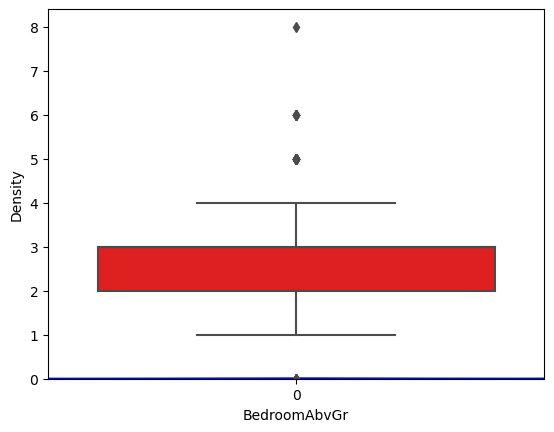

In [26]:
plt.figure()
sns.distplot(house['BedroomAbvGr'],color='b')
sns.boxplot(house['BedroomAbvGr'],color='r')
plt.show()

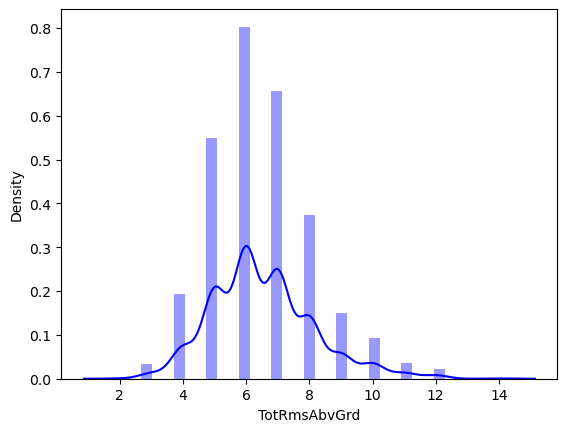

In [27]:
plt.figure()
sns.distplot(house['TotRmsAbvGrd'],color='b')
plt.show()

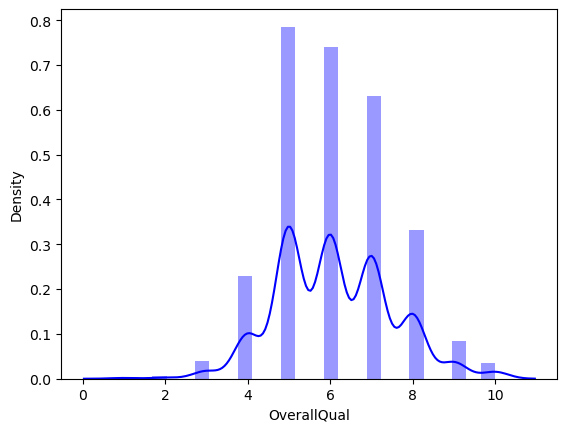

In [28]:
plt.figure()
sns.distplot(house['OverallQual'],color='b')
plt.show()

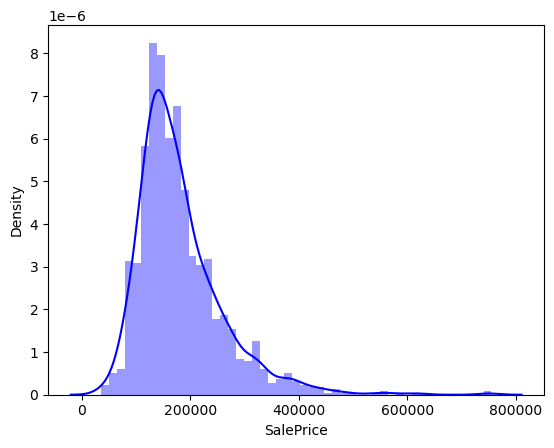

In [29]:
#visualise the dependent variable
plt.figure()
sns.distplot(house['SalePrice'],color='b')
plt.show()

In [30]:
#Remove Outliers using IQR
cols = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
         'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF','EnclosedPorch','ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'] 

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Data Analysis

In [31]:
# all numeric (float and int) variables in the dataset
house_num = house.select_dtypes(include=['float64', 'int64'])
house_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,2003.0,2,548,0,61,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,1976.0,2,460,298,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,2001.0,2,608,0,42,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1998.0,3,642,0,35,272,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,2000.0,3,836,192,84,0,0,12,2008,250000


In [32]:
# dropping ID from numerical data and from the general data set as it does not add valuable information for the regression model
house = house.drop(['Id'], axis=1)
house_num = house_num.drop(['Id'], axis=1)
house_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,2003.0,2,548,0,61,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,1976.0,2,460,298,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,2001.0,2,608,0,42,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,1998.0,3,642,0,35,272,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,2000.0,3,836,192,84,0,0,12,2008,250000


<Figure size 1000x500 with 0 Axes>

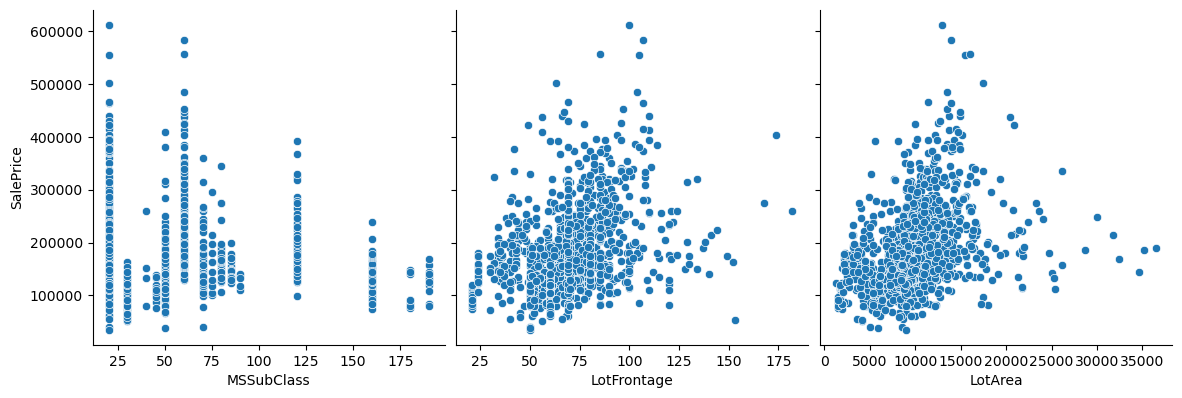

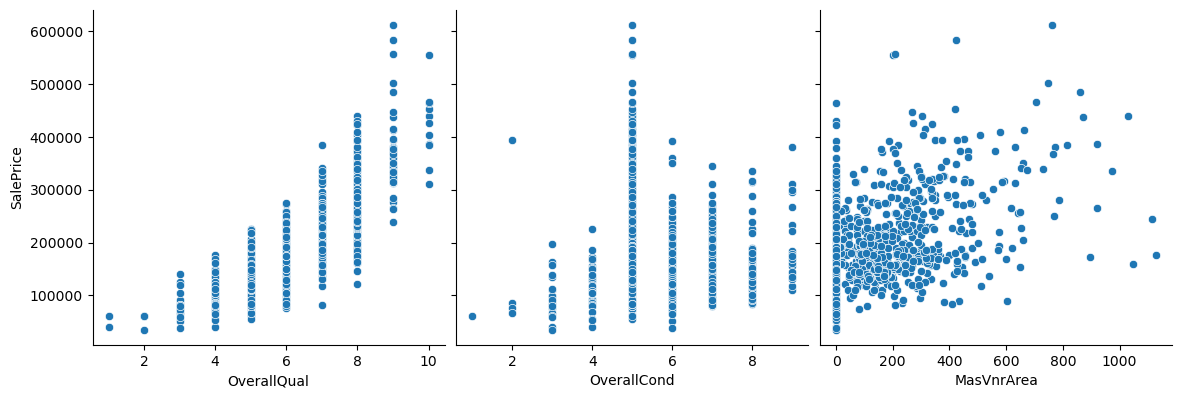

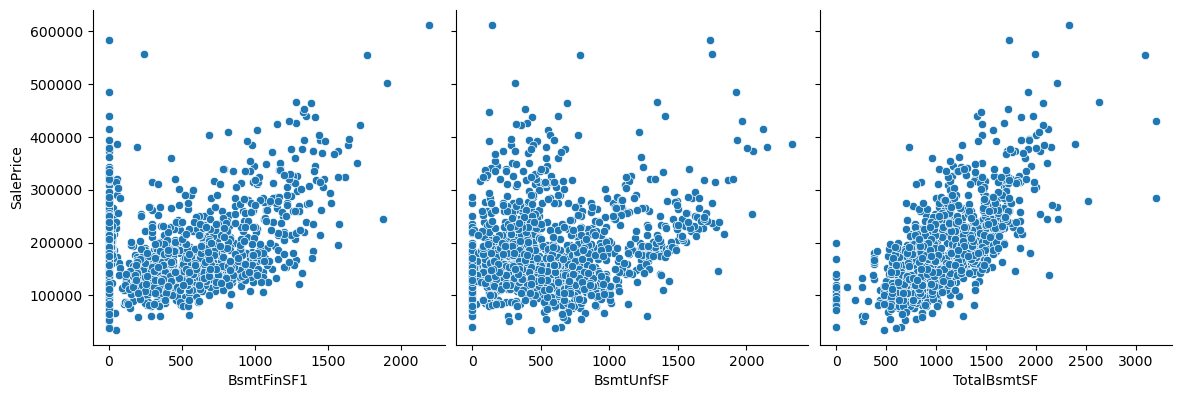

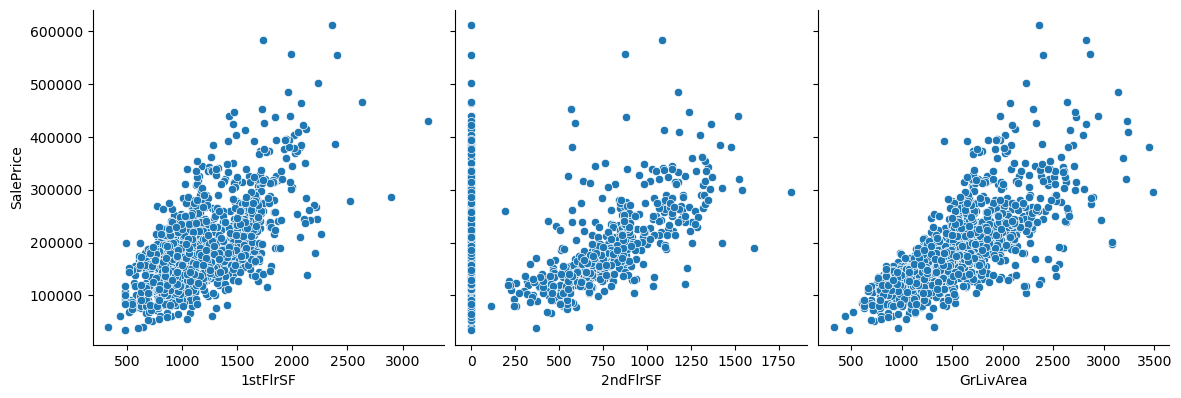

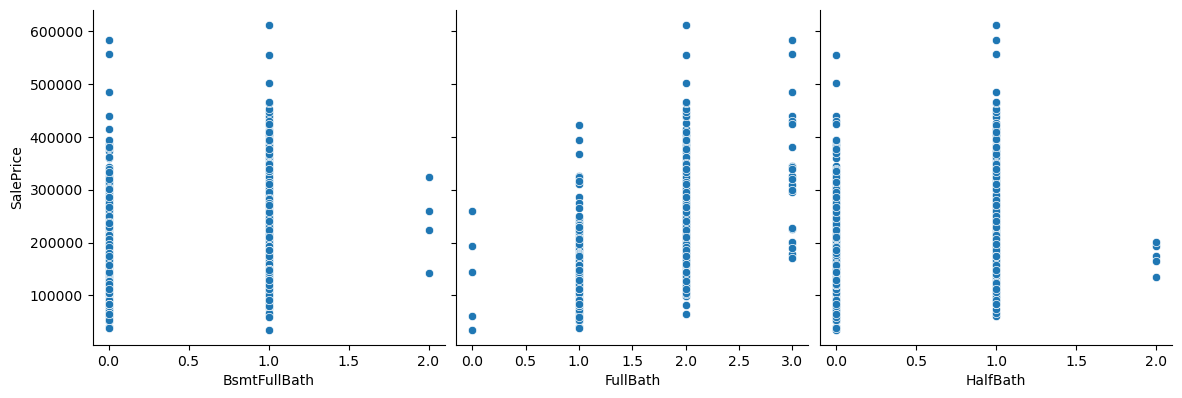

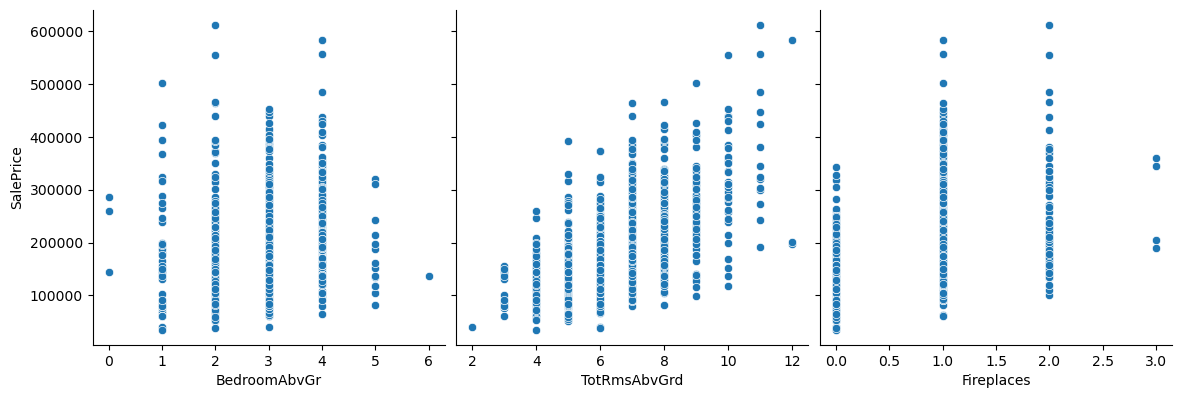

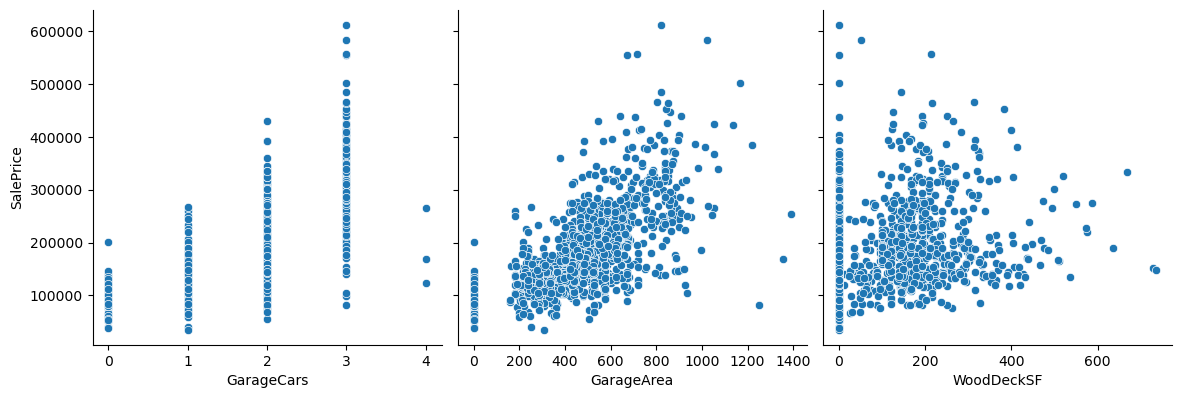

In [33]:
# Check the numerical values using pairplots

plt.figure(figsize=(10,5))
sns.pairplot(house, x_vars=['MSSubClass','LotFrontage','LotArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['OverallQual', 'OverallCond','MasVnrArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFinSF1', 'BsmtUnfSF','TotalBsmtSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['1stFlrSF','2ndFlrSF', 'GrLivArea'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BsmtFullBath','FullBath', 'HalfBath'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['BedroomAbvGr','TotRmsAbvGrd', 'Fireplaces'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
sns.pairplot(house, x_vars=['GarageCars','GarageArea', 'WoodDeckSF'], y_vars='SalePrice',height=4, aspect=1,kind='scatter')
plt.show()

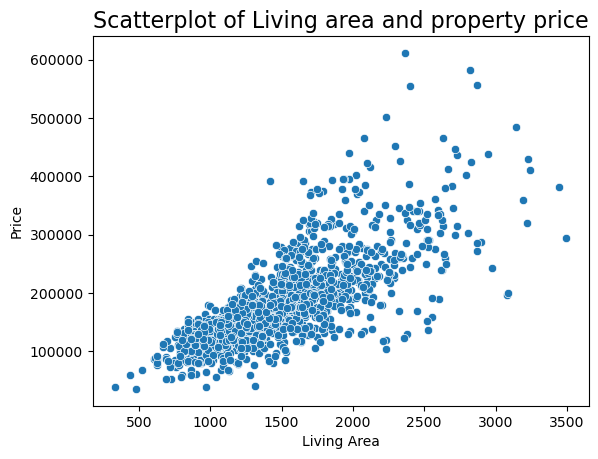

In [34]:
#scatter plot for temperature to count
sns.scatterplot(x='GrLivArea',y='SalePrice' ,data=house)
plt.title('Scatterplot of Living area and property price', fontsize=16)
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

In [35]:

# correlation matrix
cor = house_num.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.425547,-0.372512,0.093568,-0.068312,0.118881,0.087547,0.048586,-0.057058,-0.061048,...,0.124770,-0.003834,-0.074741,0.011925,0.024753,-0.041677,-0.023761,-0.017924,-0.030006,-0.052976
LotFrontage,-0.425547,1.000000,0.526729,0.220060,-0.063988,0.133988,0.079399,0.165461,0.135812,0.037861,...,0.080191,0.290353,0.317449,0.091117,0.123925,-0.000104,0.053106,0.012437,0.015370,0.360687
LotArea,-0.372512,0.526729,1.000000,0.158632,-0.028698,0.054476,0.019139,0.136209,0.186061,0.056191,...,0.002089,0.283762,0.321187,0.176458,0.147972,-0.013890,0.093827,-0.010367,-0.018141,0.363991
OverallQual,0.093568,0.220060,0.158632,1.000000,-0.134884,0.594482,0.548493,0.415394,0.203358,-0.109144,...,0.528339,0.625290,0.564754,0.225894,0.318338,-0.126046,0.040562,0.086078,-0.007288,0.806146
OverallCond,-0.068312,-0.063988,-0.028698,-0.134884,1.000000,-0.396008,0.042184,-0.136614,-0.037206,0.049467,...,-0.337851,-0.205957,-0.173479,-0.024767,-0.068616,0.081037,0.041587,0.001168,0.042487,-0.121292
YearBuilt,0.118881,0.133988,0.054476,0.594482,-0.396008,1.000000,0.611149,0.315152,0.240937,-0.078532,...,0.796183,0.572425,0.509830,0.226381,0.254271,-0.388191,-0.042973,0.018259,-0.010942,0.567447
YearRemodAdd,0.087547,0.079399,0.019139,0.548493,0.042184,0.611149,1.000000,0.179898,0.107205,-0.100204,...,0.624350,0.451437,0.390552,0.191182,0.253294,-0.209257,-0.047794,0.026091,0.046591,0.526517
MasVnrArea,0.048586,0.165461,0.136209,0.415394,-0.136614,0.315152,0.179898,1.000000,0.230565,-0.066045,...,0.251663,0.375918,0.378886,0.157370,0.131969,-0.102546,0.058424,-0.005703,0.009243,0.483124
BsmtFinSF1,-0.057058,0.135812,0.186061,0.203358,-0.037206,0.240937,0.107205,0.230565,1.000000,-0.056094,...,0.143553,0.226395,0.275884,0.173257,0.086807,-0.107368,0.074164,-0.004906,0.039701,0.385825
BsmtFinSF2,-0.061048,0.037861,0.056191,-0.109144,0.049467,-0.078532,-0.100204,-0.066045,-0.056094,1.000000,...,-0.105180,-0.064699,-0.037398,0.050483,-0.023879,0.054918,0.051395,-0.003287,0.047712,-0.068523


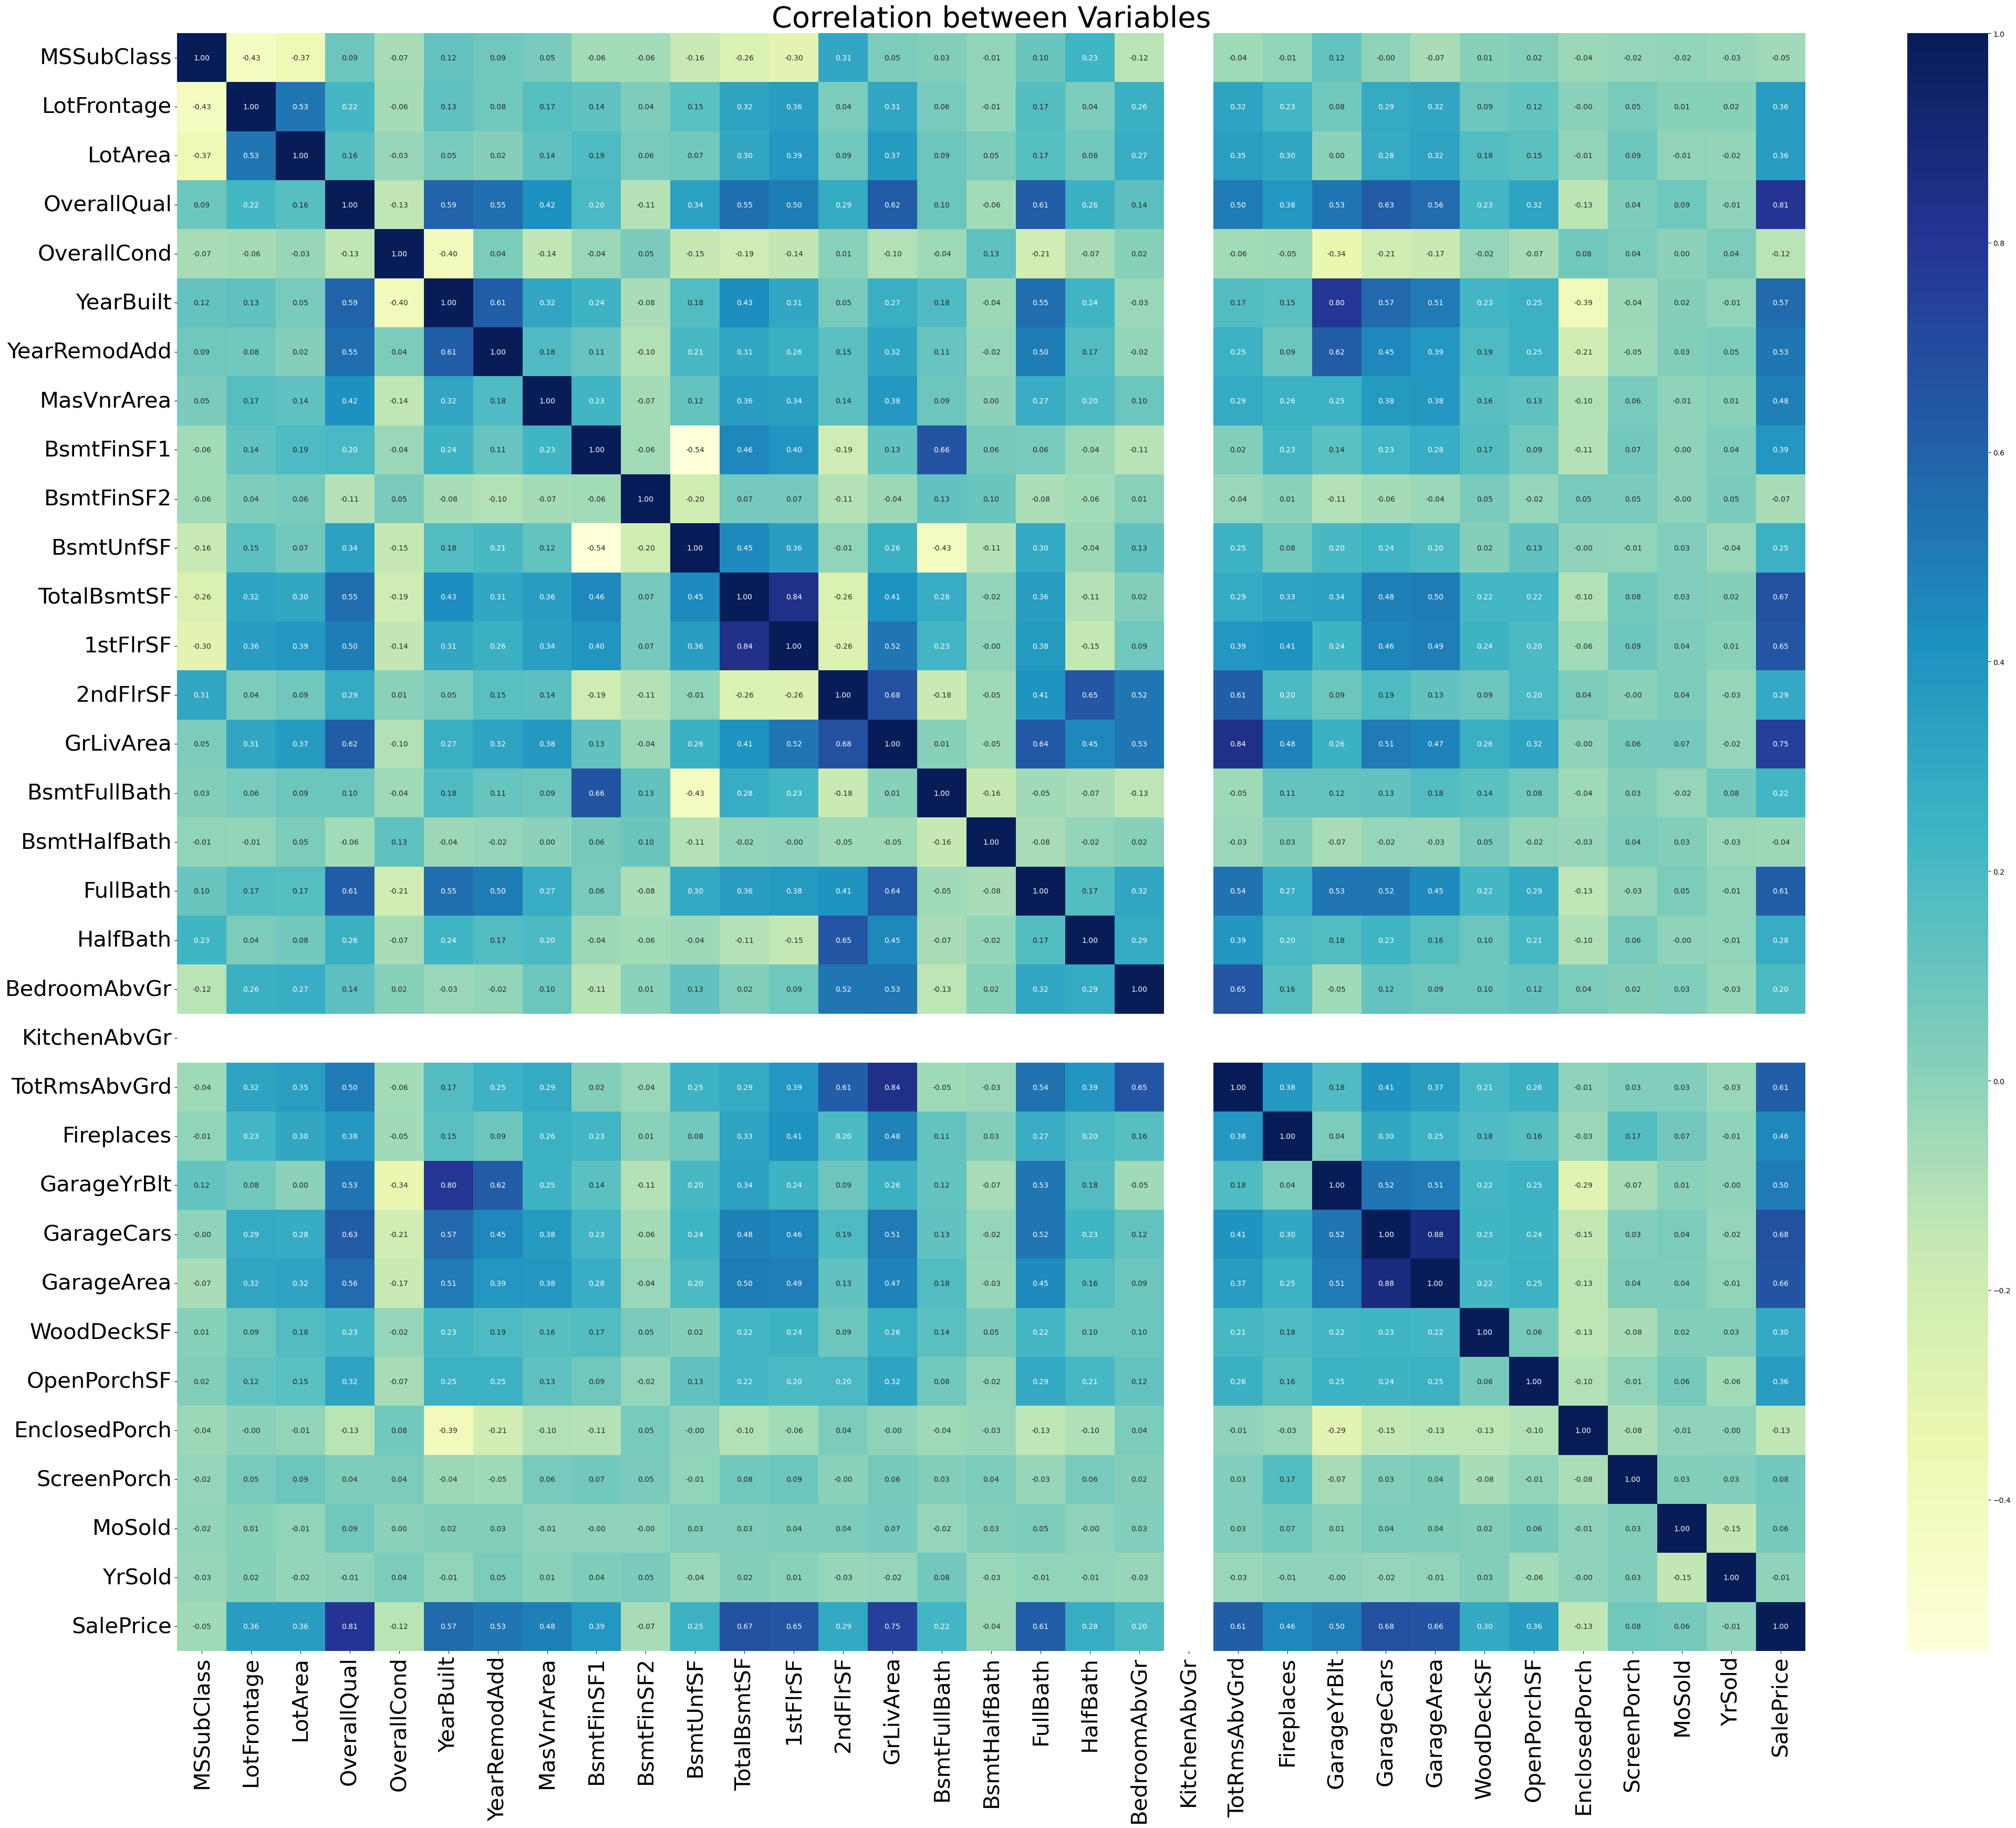

In [36]:
# plotting correlations on a heatmap

plt.figure(figsize=(50,40))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True, fmt='.2f')
plt.title("Correlation between Variables", fontsize=40)
plt.show()

In [37]:
# Dropping highly correlated features
house.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea', 'GarageYrBlt'], axis=1,inplace=True)

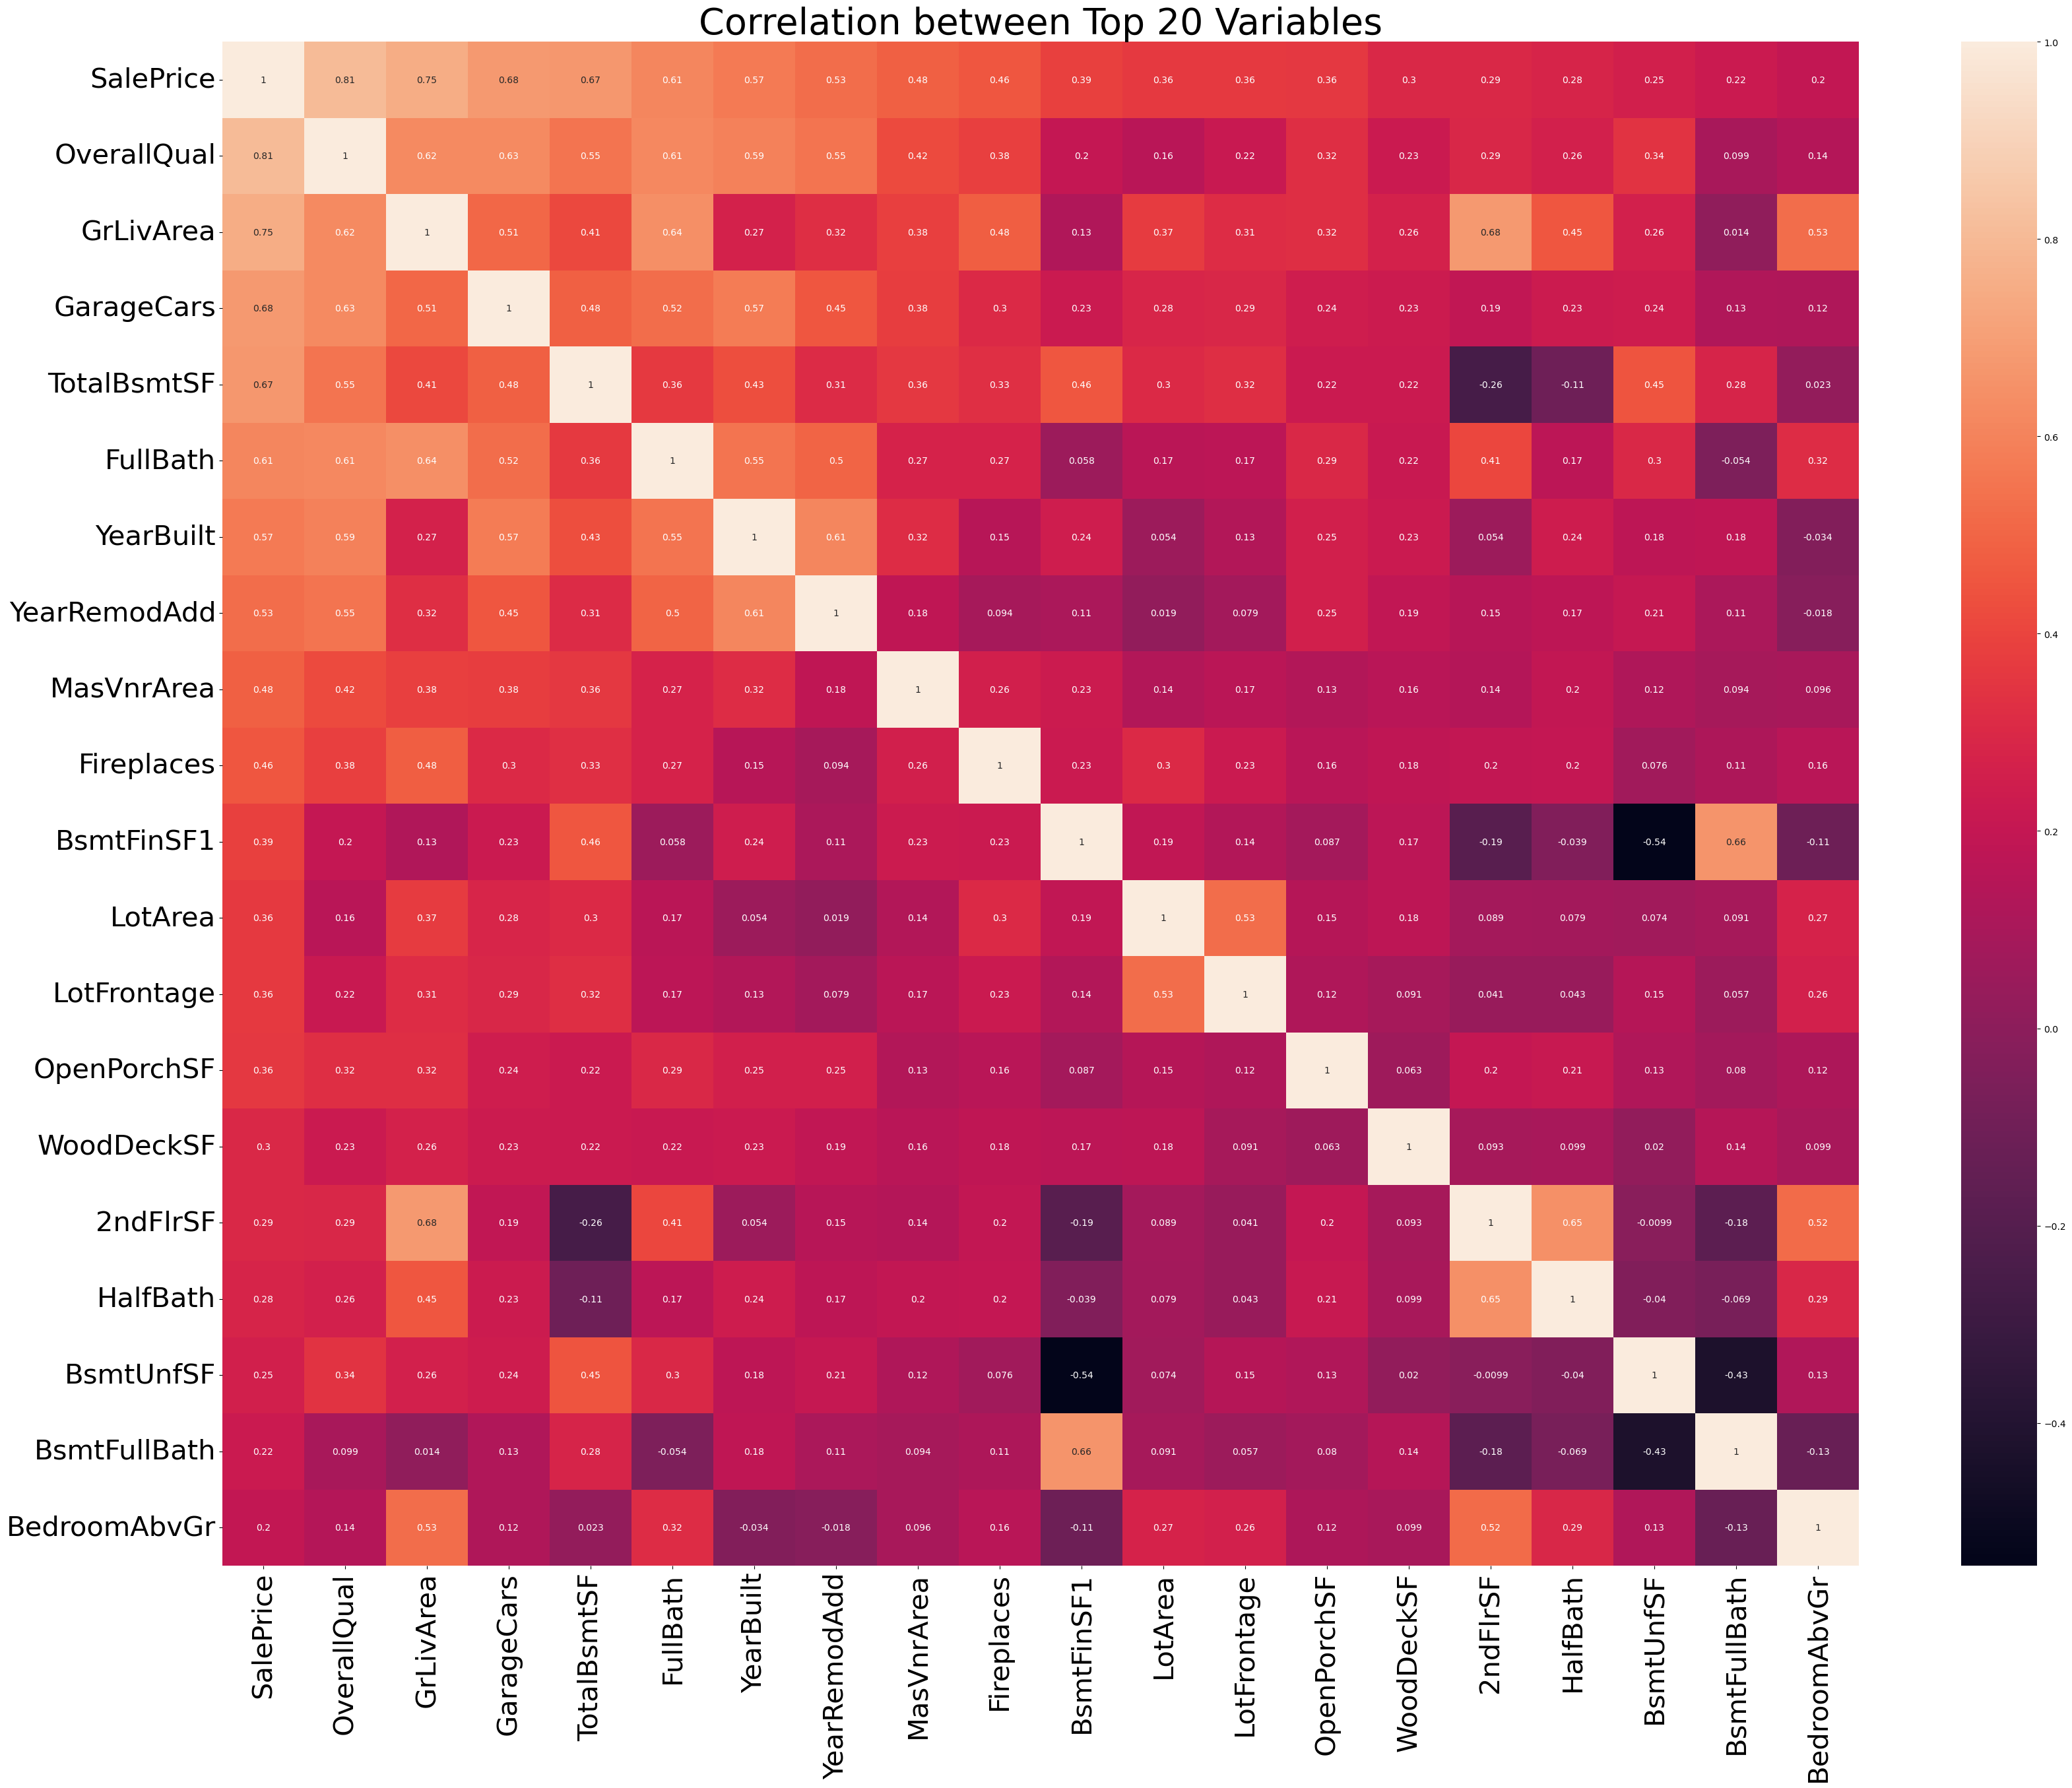

In [38]:
# sales price correlation matrix
plt.figure(figsize=(40,30))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
n = 20 # number of variables which have the highest correlation with 'Sales price'

corrmat = house.corr()

cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
#plt.figure(dpi=100)
sns.heatmap(house[cols].corr(),annot=True)
plt.title("Correlation between Top 20 Variables", fontsize=40)
plt.show()

## Data Preparation

In [39]:
#Check which columns containg categorical data
house_categorical=house.select_dtypes(include=['object'])
house_categorical.head()


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [40]:
# Convert categorical value into Dummy variables (one hot encoding)
house_dummies=pd.get_dummies(house_categorical,drop_first=True)
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [41]:
house_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [42]:
# drop categorical variables from the dataset and save as predictor variable X
X= house.drop(list(house_categorical.columns), axis=1)

In [43]:
#removing response variable from the set
X=X.drop(['SalePrice'], axis=1)

In [44]:
y = house['SalePrice'] # response variable in Y

In [45]:
# concat dummy variables with X
X = pd.concat([X, house_dummies], axis=1)

In [46]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [47]:
# storing column names in cols (the df is converted to a numpy array)
# Standardize a dataset along any axis
# Center to the mean and component wise scale to unit variance.
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=216)

In [48]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.142926,-0.214729,-0.301556,0.643699,-0.537949,1.025211,0.848046,0.557189,0.630373,-0.290924,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429
1,-0.849686,0.537784,-0.022178,-0.095383,2.183911,0.116681,-0.461085,-0.593667,1.271641,-0.290924,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429
2,0.142926,-0.064226,0.378669,0.643699,-0.537949,0.957913,0.799559,0.357551,0.111701,-0.290924,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429
3,0.391079,-0.465566,-0.034325,0.643699,-0.537949,-1.935926,-0.752003,-0.593667,-0.524852,-0.290924,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,-2.178477,-0.314429
4,0.142926,0.738454,1.109911,1.382781,-0.537949,0.924263,0.702587,1.461433,0.510136,-0.290924,...,-0.054393,-0.060836,-0.310162,-0.038433,0.396228,-0.038433,-0.054393,-0.112677,0.459036,-0.314429


## Model Building

In [49]:
# split into train and test
X_train, X_test, y_train,  y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#### Linear Model

In [50]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2 train: ', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2 test: ',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1: ',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2: ',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE train: ',mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE test: ',mse_test_lr)
metric.append(mse_test_lr**0.5)

r2 train:  0.9449110217770301
r2 test:  -4.228531010810754e+22
rss1:  301637605618.7086
rss2:  9.081940866930218e+34
MSE train:  317847845.7520639
MSE test:  2.231435102439857e+32


#### Ridge Regression

In [52]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [53]:
# Printing the best hyperparameter alpha
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 100}
-16028.169876392156


In [54]:
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([-3.10025442e+03,  1.65800756e+03,  5.15233421e+03,  9.82261691e+03,
        4.63540663e+03,  4.18890305e+03,  3.26141025e+03,  2.66512130e+03,
        7.93303130e+03,  1.08659737e+03,  1.40331446e+03,  1.04204851e+04,
        4.80507174e+03,  1.59140167e+04,  1.10822768e+03, -7.64797665e+02,
        3.97066346e+03,  3.05258606e+03, -9.17543040e+02,  0.00000000e+00,
        2.11510029e+03,  5.93241035e+03,  7.90006254e+02,  1.16825254e+03,
        1.13649833e+02,  1.74675897e+03, -1.08333365e+03,  9.23365309e+01,
        5.77558458e+02, -1.68188897e+02,  1.76585192e+03, -3.57958770e+02,
        2.02893440e+03, -1.02110518e+02, -8.16476389e+02,  1.85628545e+02,
        1.46411341e+03, -1.37678958e+03,  1.44820561e+02, -7.28523259e+02,
        1.78620159e+03, -1.23678581e+03, -2.77093456e+02,  8.85836014e+01,
       -3.98919608e+02, -2.05491543e+03,  2.92038318e+02,  9.17560878e+02,
        1.00823364e+03, -2.43861638e+02, -1.18400222e+03,  3.17178328e+03,
       -1.68099475e+03, -

In [55]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.938529140433167
0.9072921275418232
336581354259.5739
199115819042.47076
354669498.69291246
489228056.6154073


#### Lasso Regression

In [56]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [57]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 500}
-15466.6072361824


In [58]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [59]:
lasso.coef_

array([-3.78137582e+03,  6.20478012e+02,  6.14738023e+03,  7.86657947e+03,
        6.35444503e+03,  8.91839451e+03,  1.57795122e+03,  7.45978986e+02,
        1.45330127e+04,  4.05460674e+03,  5.91532251e+03,  4.29204455e+03,
        4.03482083e+03,  2.58864415e+04,  2.65729534e+02, -7.47571817e+02,
        2.15627317e+03,  1.87373471e+03, -2.50577949e+03,  0.00000000e+00,
        4.12147363e+02,  5.79403352e+03,  3.18833797e+02,  4.64925856e+02,
        7.39535161e+02,  2.05147605e+03, -1.21628491e+03, -5.32447396e+02,
        4.30772865e+03,  1.46101942e+03,  8.56323604e+03,  6.32856314e+03,
        1.58580518e+03, -4.13539307e+02, -8.94621812e+02,  5.37381180e+02,
        1.84477449e+03, -1.65049558e+03,  5.18314101e+02, -8.00573054e+02,
        1.35344018e+03, -1.38452203e+03, -1.03080386e+02,  1.44506309e+02,
       -5.57117824e+02, -3.81601185e+03,  2.24961914e+02,  3.97506212e+02,
       -7.01169511e+02, -1.73890597e+03, -3.44388235e+03,  1.75048054e+03,
       -4.18040283e+03, -

In [60]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9449020524804952
0.8959221767997542
301686716660.8473
223535935635.06067
317899596.0599023
549228343.0836872


In [61]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.449110e-01,9.385291e-01,9.449021e-01
1,R2 Score (Test),-4.228531e+22,9.072921e-01,8.959222e-01
2,RSS (Train),3.016376e+11,3.365814e+11,3.016867e+11
3,RSS (Test),9.081941e+34,1.991158e+11,2.235359e+11
4,MSE (Train),1.782829e+04,1.883267e+04,1.782974e+04
5,MSE (Test),1.493799e+16,2.211850e+04,2.343562e+04


### Ridge Predictions

In [62]:
ridge_pred = ridge.predict(X_test)

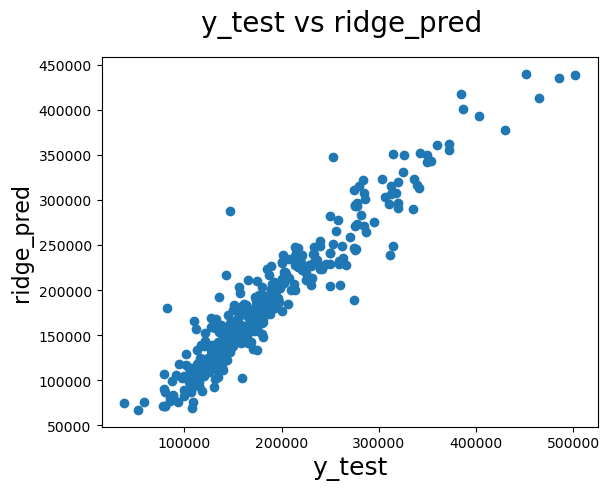

In [63]:
# Plotting y_test and y_pred to understand the spread for ridge regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('ridge_pred', fontsize=16)  
plt.show()

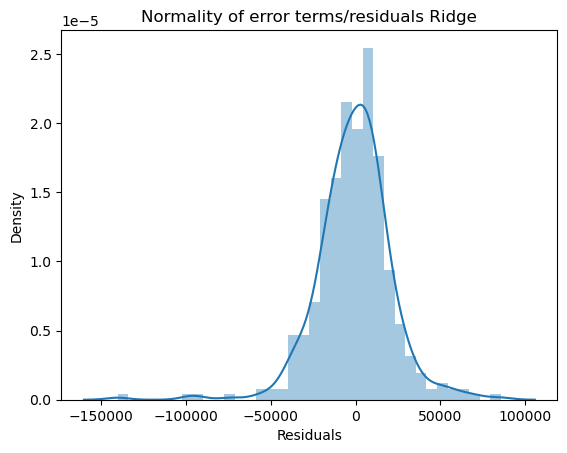

In [64]:
y_res=y_test-ridge_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Ridge')
plt.xlabel("Residuals")
plt.show()

### Lasso Predections

In [65]:
lasso_pred = lasso.predict(X_test)

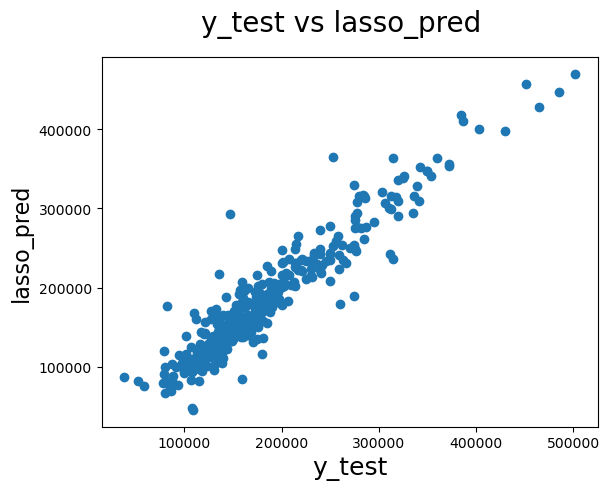

In [66]:
# Plotting y_test and y_pred to understand the spread for lasso regression.
fig = plt.figure(dpi=100)
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('lasso_pred', fontsize=16)  
plt.show()

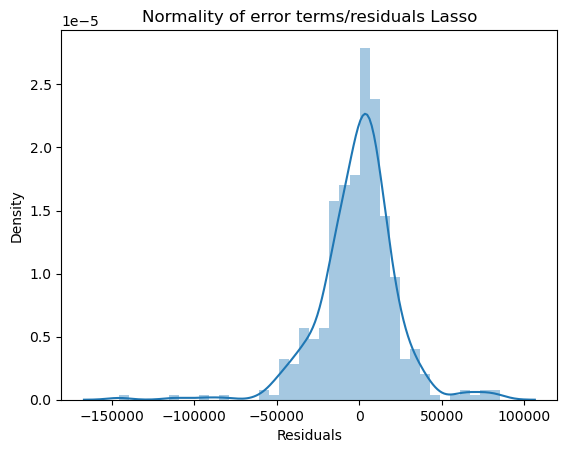

In [67]:
y_res=y_test-lasso_pred
# Distribution of errors
sns.distplot(y_res,kde=True)
plt.title('Normality of error terms/residuals Lasso')
plt.xlabel("Residuals")
plt.show()

### Evaluation

The model shows that there are some variables that are highly relevant to the sales price.
Suggestions for Surprise Housing is to keep a check on these predictors affecting the price of the house.
The higher values of positive coeeficients suggest a high sale value.
Some of those features are:

| Feature	| Description|
|-----------|-----------|
| GrLivArea	| Above grade (ground) living area square feet |
| OverallQual	|  Rates the overall material and finish of the house |
| OverallCond | 	Rates the overall condition of the house |
| TotalBsmtSF | 	Total square feet of basement area |
| GarageArea	| Size of garage in square feet|